In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [175]:
df = pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
375654,1003822,P00116742,M,46-50,20.0,C,1,0.0,11.0,6092.0
375655,1003822,P00182142,M,46-50,20.0,C,1,0.0,1.0,11581.0
375656,1003823,P00112442,M,55+,7.0,B,1,0.0,6.0,20414.0
375657,1003823,P00182342,M,55+,7.0,B,1,0.0,1.0,19696.0


# Defining Problem Statement and Analyzing basic metrics

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375659 entries, 0 to 375658
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     375659 non-null  int64  
 1   Product_ID                  375659 non-null  object 
 2   Gender                      375658 non-null  object 
 3   Age                         375658 non-null  object 
 4   Occupation                  375658 non-null  float64
 5   City_Category               375658 non-null  object 
 6   Stay_In_Current_City_Years  375658 non-null  object 
 7   Marital_Status              375658 non-null  float64
 8   Product_Category            375658 non-null  float64
 9   Purchase                    375658 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 28.7+ MB


In [177]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [178]:
# Their is only one row with Nan value so better to drop it
df = df.dropna(axis = 0)

#Change the data types of - Occupation, Marital_Status, Product_Category

cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

<ipython-input-178-367352d48f10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].astype('object')


In [179]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [180]:
df.describe()

,User_ID,Purchase
count,3.756580e+05,375658.000000
mean,1.002955e+06,9326.964489
std,1.714878e+03,4976.730193
min,1.000001e+06,185.000000
25%,1.001456e+06,5866.000000
50%,1.002967e+06,8061.000000
75%,1.004381e+06,12067.000000
max,1.006040e+06,23961.000000


In [181]:
df[['Occupation', 'Marital_Status', 'Product_Category', "Product_ID", "Age", "City_Category", "Stay_In_Current_City_Years"]].describe()

,Occupation,Marital_Status,Product_Category,Product_ID,Age,City_Category,Stay_In_Current_City_Years
count,375658.0,375658.0,375658.0,375658,375658,375658,375658
unique,21.0,2.0,18.0,3560,7,3,5
top,4.0,0.0,5.0,P00265242,26-35,B,1
freq,49774.0,221740.0,103990.0,1257,149645,158354,132090


## Non-Graphical Analysis: Value counts and unique attributes ​

In [182]:
# User_ID	Occupation	Marital_Status	Product_Category	Purchase
df['User_ID'].value_counts()

1001680    741
1004277    631
1001941    629
1001181    605
1000889    603
          ... 
1004178      4
1005110      3
1004527      3
1002111      3
1005391      3
Name: User_ID, Length: 5891, dtype: int64

In [183]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [184]:
df['Occupation'].value_counts()

4.0     49774
0.0     47660
7.0     40414
1.0     32075
17.0    27327
20.0    23071
12.0    21119
14.0    18642
2.0     18116
16.0    17207
6.0     13900
3.0     12104
10.0     8870
15.0     8256
5.0      8240
11.0     8004
19.0     5815
13.0     5326
18.0     4387
9.0      4315
8.0      1036
Name: Occupation, dtype: int64

In [185]:
df['Occupation'].unique()

array([10.0, 16.0, 15.0, 7.0, 20.0, 9.0, 1.0, 12.0, 17.0, 0.0, 3.0, 4.0,
       11.0, 8.0, 19.0, 2.0, 18.0, 5.0, 14.0, 13.0, 6.0], dtype=object)

In [186]:
df['Marital_Status'].value_counts()

0.0    221740
1.0    153918
Name: Marital_Status, dtype: int64

In [187]:
df['Marital_Status'].unique()

array([0.0, 1.0], dtype=object)

In [188]:
df['Product_Category'].value_counts()

5.0     103990
1.0      96500
8.0      78520
11.0     16677
2.0      16449
3.0      13946
6.0      13934
4.0       8142
16.0      6765
15.0      4350
13.0      3783
10.0      3527
12.0      2695
7.0       2582
18.0      2096
14.0      1037
17.0       397
9.0        268
Name: Product_Category, dtype: int64

In [189]:
df['Product_Category'].unique()

array([3.0, 1.0, 12.0, 8.0, 5.0, 4.0, 2.0, 6.0, 14.0, 11.0, 13.0, 15.0,
       7.0, 16.0, 18.0, 10.0, 17.0, 9.0], dtype=object)

In [190]:
df['Purchase'].value_counts()

7193.0     140
7027.0     136
7093.0     136
7089.0     135
6928.0     131
          ... 
16965.0      1
18603.0      1
21493.0      1
17314.0      1
8928.0       1
Name: Purchase, Length: 17266, dtype: int64

In [191]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ..., 13832., 13945.,  8928.])

In [192]:
df['Gender'].value_counts()

M    283187
F     92471
Name: Gender, dtype: int64

In [193]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

## Visual Analysis - Univariate & Bivariate

**For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

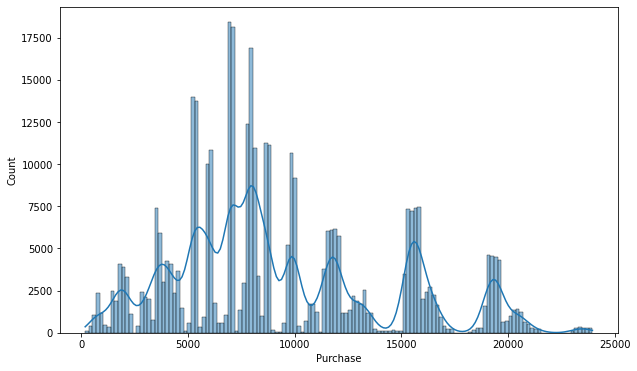

In [194]:
# User_ID	Occupation	Marital_Status	Product_Category	Purchase

plt.figure(figsize = (10, 6))
sns.histplot(x = 'Purchase', data = df, kde = True)
plt.show()

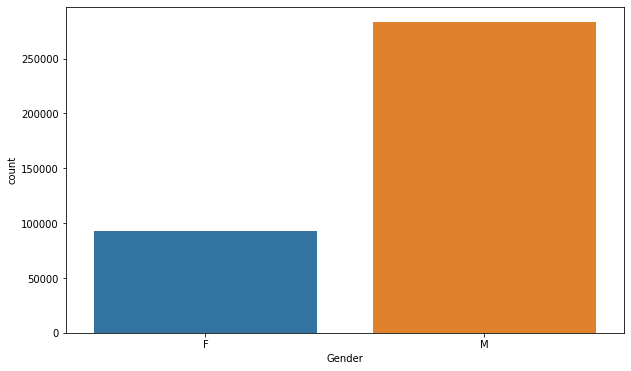

In [195]:


plt.figure(figsize = (10, 6))
sns.countplot(x = 'Gender', data = df)
plt.show()

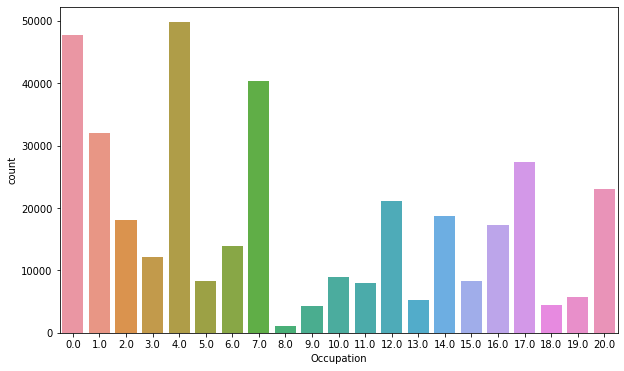

In [196]:


plt.figure(figsize = (10, 6))
sns.countplot(x = 'Occupation', data = df)
plt.show()

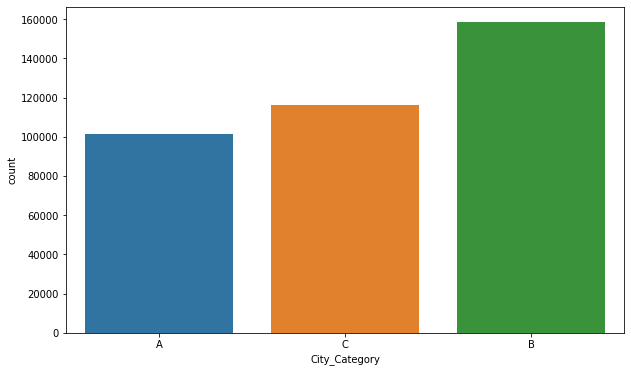

In [197]:


plt.figure(figsize = (10, 6))
sns.countplot(x = 'City_Category', data = df)
plt.show()

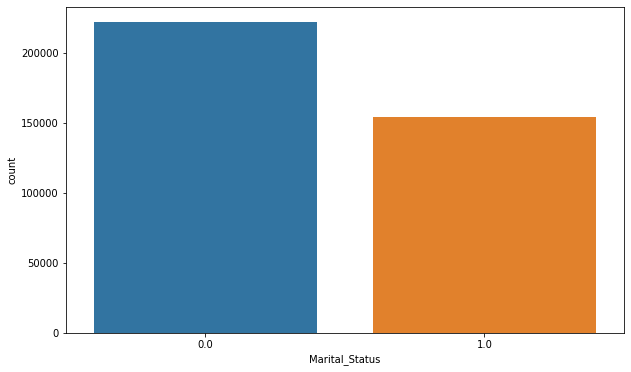

In [198]:


plt.figure(figsize = (10, 6))
sns.countplot(x = 'Marital_Status', data = df)
plt.show()

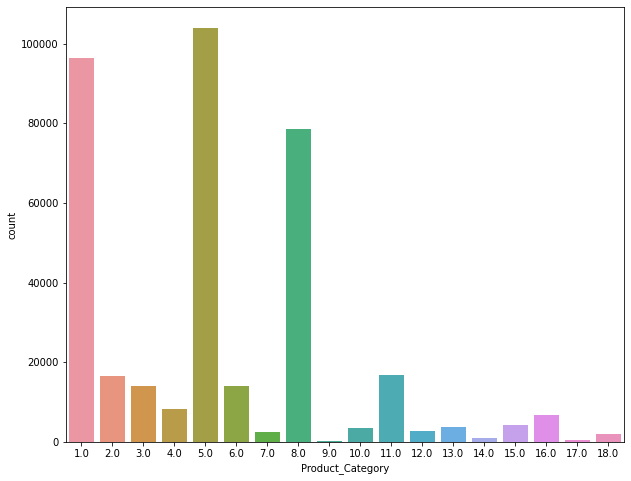

In [199]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

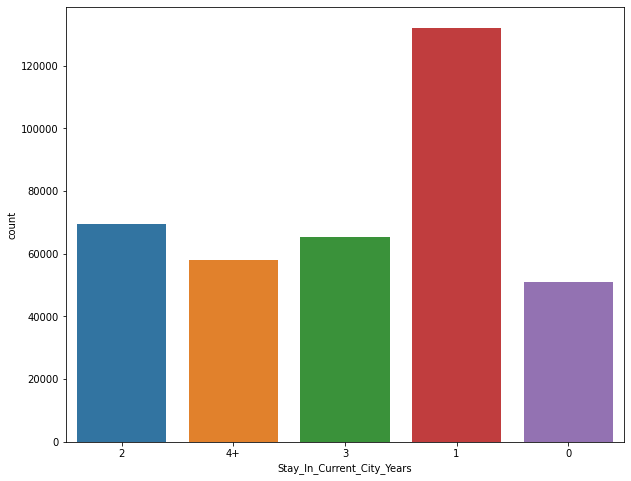

In [200]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Stay_In_Current_City_Years')
plt.show()

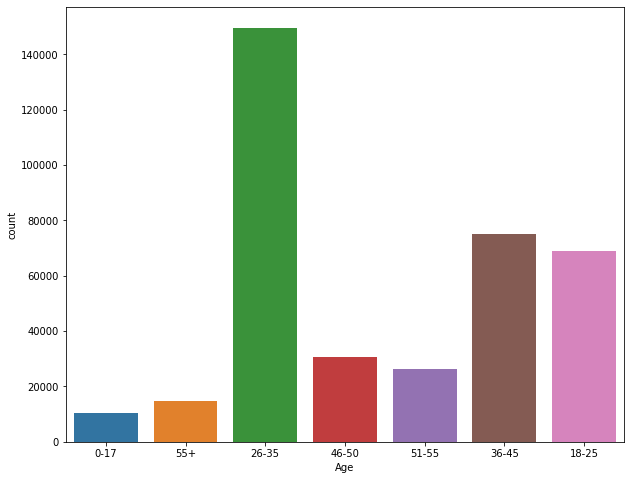

In [201]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Age')
plt.show()

**For categorical variable(s): Boxplot**

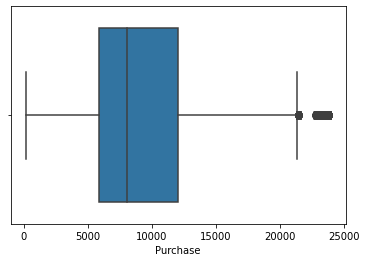

In [202]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

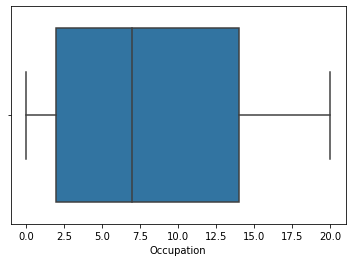

In [203]:
sns.boxplot(data=df, x='Occupation', orient='h')
plt.show()

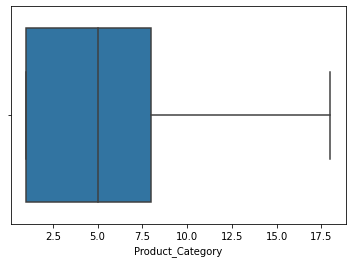

In [204]:
sns.boxplot(data=df, x='Product_Category', orient='h')
plt.show()

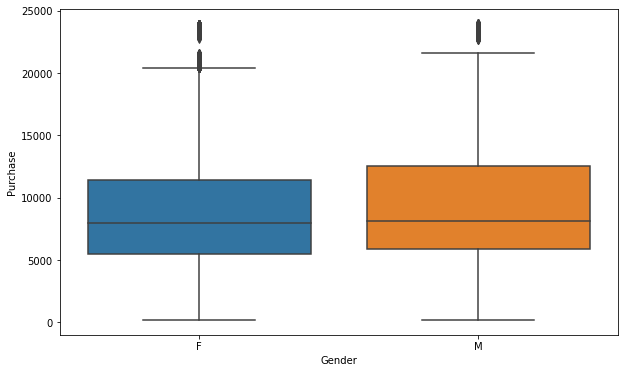

In [205]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Gender', y = 'Purchase')
plt.show()

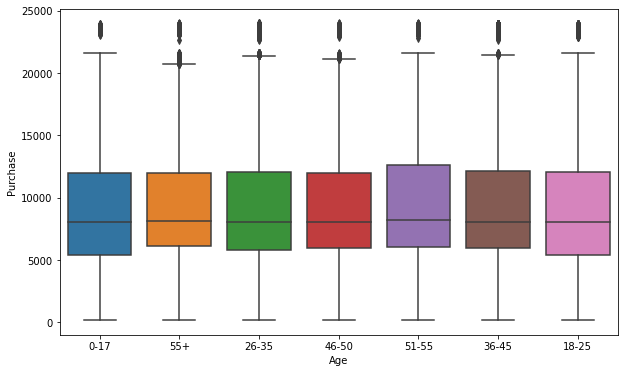

In [206]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase')
plt.show()

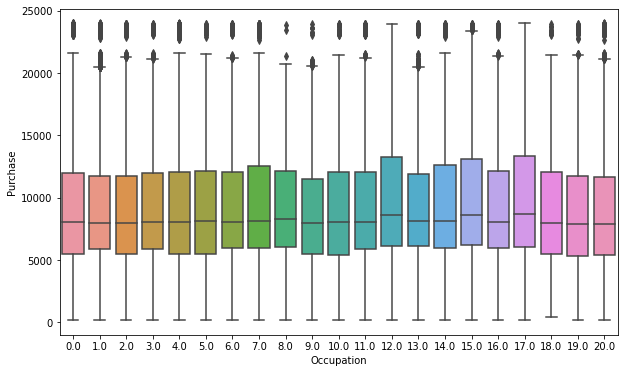

In [207]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Occupation', y = 'Purchase')
plt.show()

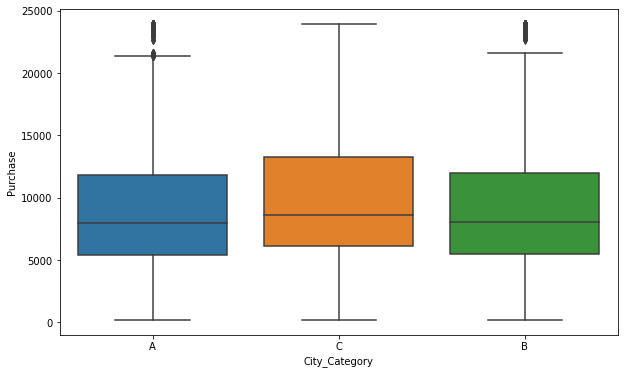

In [208]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase')
plt.show()

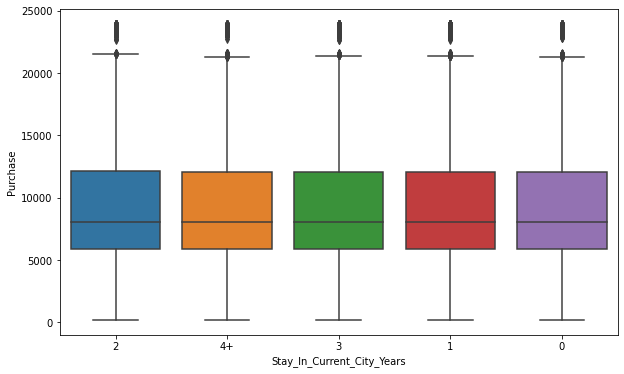

In [209]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase')
plt.show()

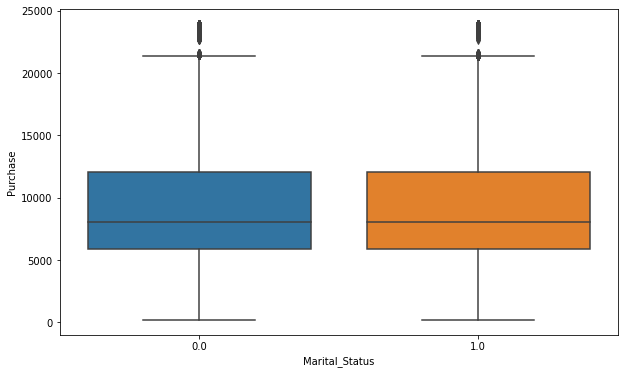

In [210]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase')
plt.show()

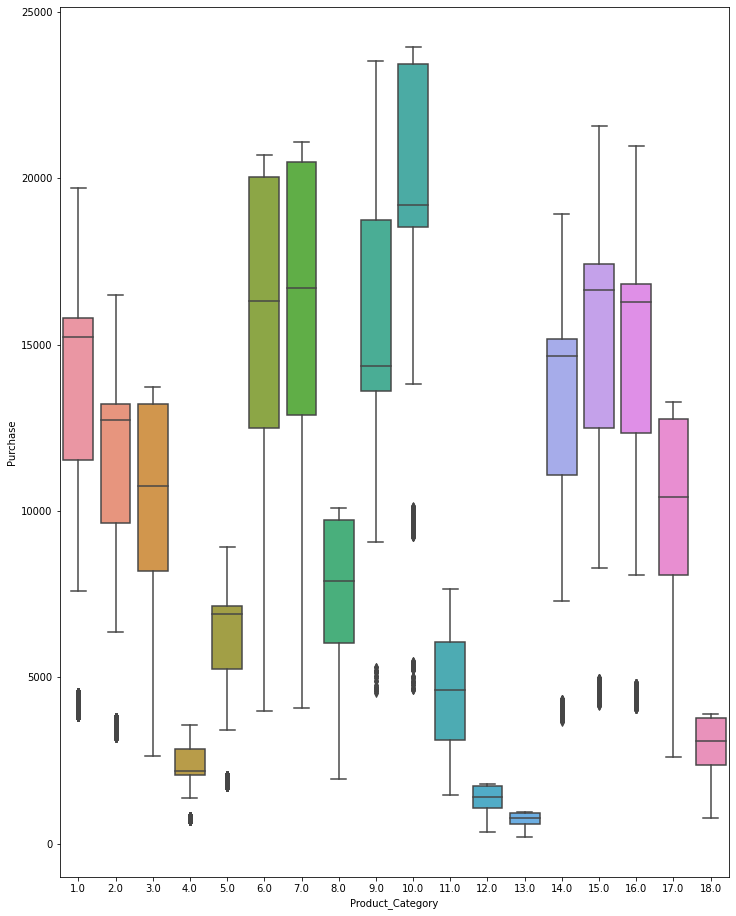

In [211]:
plt.figure(figsize = (12, 16))
sns.boxplot(data = df, x = 'Product_Category', y = 'Purchase')
plt.show()

**For correlation: Heatmaps, Pairplots**

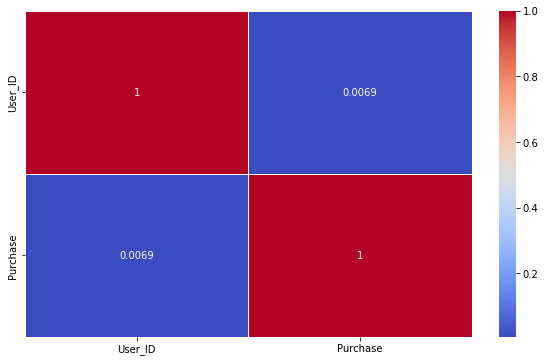

In [212]:
plt.figure(figsize = (10, 6))
sns.heatmap( df.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm')
plt.show()

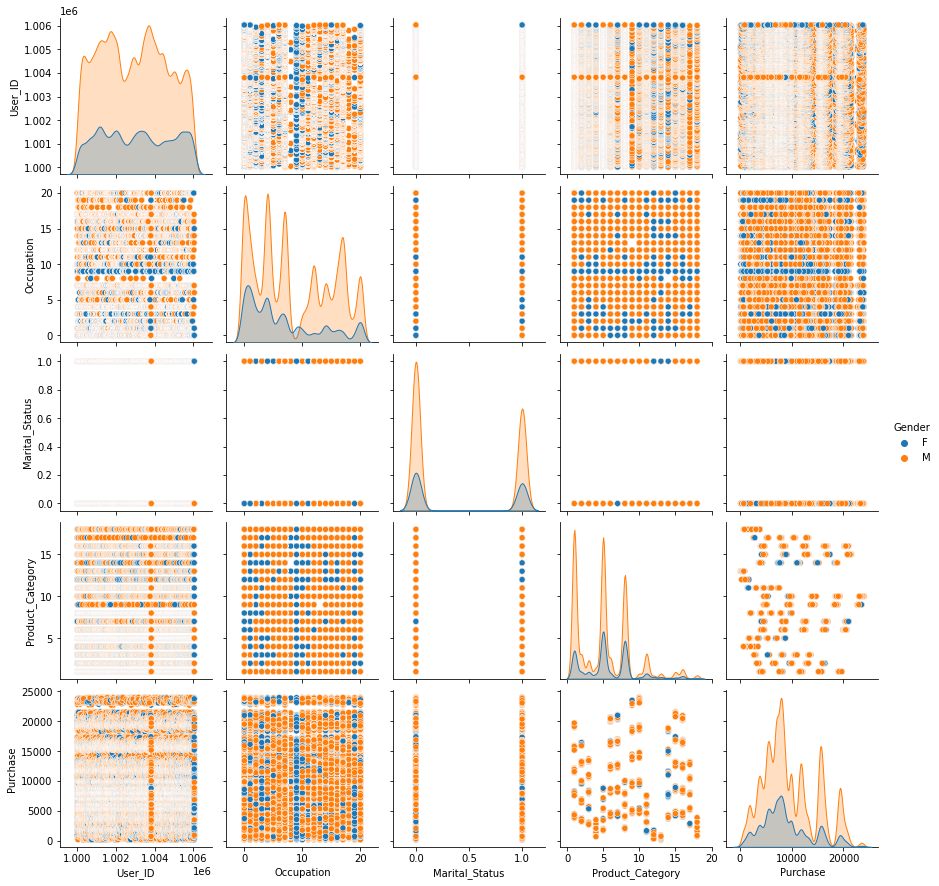

In [213]:
sns.pairplot(df, hue = 'Gender')


# Missing Value & Outlier Detection 

In [214]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Their are no missing values

In [215]:
data = []

for Att in ["User_ID", "Occupation", "Marital_Status", "Product_Category", "Purchase"]:
  for model in df['Gender'].unique():
  
    obj = {}

    q1 = df.loc[df['Gender'] == model, Att].quantile(.25)
    q3 = df.loc[df['Gender'] == model, Att].quantile(.75)

    iqr = q3 - q1
    upper_w = q3 + 1.5*iqr
    lower_w = q1 - 1.5*iqr if q1 - 1.5*iqr > 0 else 0
    outliers = len(df.loc[(df['Gender'] == model) & (df[Att] > upper_w)]) + len(df.loc[(df['Gender'] == model) & (df[Att] < lower_w)])

    obj['Attributes'] = Att
    obj['Gender'] = "Male" if model == 'M' else "Female"
    obj['Upper_Whisker'] = upper_w
    obj['Inter Quartile Range'] = iqr
    obj['Lower_Whisker'] = lower_w
    obj['Outliers'] = outliers

    data.append(obj)
pd.DataFrame(data)

,Attributes,Gender,Upper_Whisker,Inter Quartile Range,Lower_Whisker,Outliers
0,User_ID,Female,1009375.5,3171.0,996691.5,0
1,User_ID,Male,1008592.0,2854.0,997176.0,0
2,Occupation,Female,26.0,10.0,0.0,0
3,Occupation,Male,33.0,12.0,0.0,0
4,Marital_Status,Female,2.5,1.0,0.0,0
5,Marital_Status,Male,2.5,1.0,0.0,0
6,Product_Category,Female,15.5,5.0,0.0,1970
7,Product_Category,Male,18.5,7.0,0.0,0
8,Purchase,Female,20413.0,5982.0,0.0,1317
9,Purchase,Male,22434.5,6613.0,0.0,1273


# Business Insights based on Non- Graphical and Visual Analysis

## Comments on the range of attributes

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375658 entries, 0 to 375657
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     375658 non-null  int64  
 1   Product_ID                  375658 non-null  object 
 2   Gender                      375658 non-null  object 
 3   Age                         375658 non-null  object 
 4   Occupation                  375658 non-null  object 
 5   City_Category               375658 non-null  object 
 6   Stay_In_Current_City_Years  375658 non-null  object 
 7   Marital_Status              375658 non-null  object 
 8   Product_Category            375658 non-null  object 
 9   Purchase                    375658 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 39.6+ MB


In [221]:
# For Non Categorical Values

data = []
for att in df.columns:
  if df[att].dtype == 'int64':

    obj = {}

    obj['Attributes'] = att
    obj['Min_Value'] = df[att].min()
    obj['Mean'] = df[att].mean()
    obj['Max_Value'] = df[att].max()

    data.append(obj)

pd.DataFrame(data)

,Attributes,Min_Value,Mean,Max_Value
0,User_ID,1000001,1.002955e+06,1006040


In [226]:
df['Occupation']

0         10.0
1         10.0
2         10.0
3         10.0
4         16.0
          ... 
375653    20.0
375654    20.0
375655    20.0
375656     7.0
375657     7.0
Name: Occupation, Length: 375658, dtype: object

In [228]:
 # For categorical Values

data = []

for att in df.columns:
  if df[att].dtype == 'object':
    obj = {}

    # print(att, str(df[att][0])[0].isdigit())
    if str(df[att][0])[0].isdigit():
      most_freq = df[att].value_counts().index[0], max(df[att].value_counts())
      less_freq = df[att].value_counts().index[-1], min(df[att].value_counts())
    else:
      most_freq = df[att].value_counts().index[0], df[att].value_counts()[0]
      less_freq = df[att].value_counts().index[-1], df[att].value_counts()[-1]
      

    obj['Attributes'] = att
    obj['Most Frequent'] = most_freq
    obj['Less Frequent'] = less_freq

    data.append(obj)
    
pd.DataFrame(data)


,Attributes,Most Frequent,Less Frequent
0,Product_ID,"(P00265242, 1257)","(P00315242, 1)"
1,Gender,"(M, 283187)","(F, 92471)"
2,Age,"(26-35, 149645)","(0-17, 10325)"
3,Occupation,"(4.0, 49774)","(8.0, 1036)"
4,City_Category,"(B, 158354)","(A, 101246)"
5,Stay_In_Current_City_Years,"(1, 132090)","(0, 50839)"
6,Marital_Status,"(0.0, 221740)","(1.0, 153918)"
7,Product_Category,"(5.0, 103990)","(9.0, 268)"


## Comments on the distribution of the variables and relationship between them AND Comments for each univariate and bivariate plot

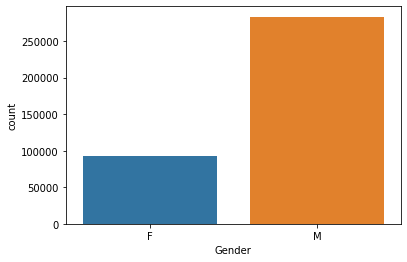

In [229]:
sns.countplot(x = 'Gender', data = df)
plt.show()

1. Male customers are more as compared to female

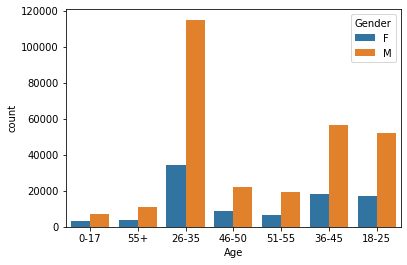

In [230]:
sns.countplot(x = 'Age', data = df, hue = 'Gender')
plt.show()

1. Male group with age between 26 -35 are heighest among shopping
2. Female group with age between 26 -35 are heighest among shopping
3. Male group with age between 0-17 are least among shopping
4. Female group with age 55+ are least among shopping

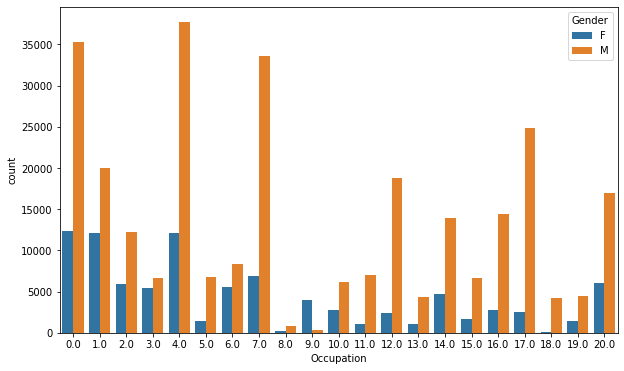

In [231]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Occupation', data = df, hue = 'Gender')
plt.show()

1. Occupation 4 has heighest number of males
2. Occupation 0, 1, 4 have relatively same number of females
3. Occupation 9 has least number of males
4. Occupation 8, 18 has least number of females


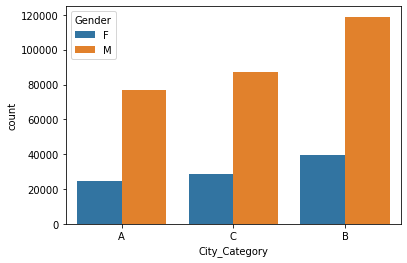

In [232]:
sns.countplot(x = 'City_Category', data = df, hue = 'Gender')
plt.show()

1. City Category of B has heighest number of Males
2. City Category of B has heighest number of females

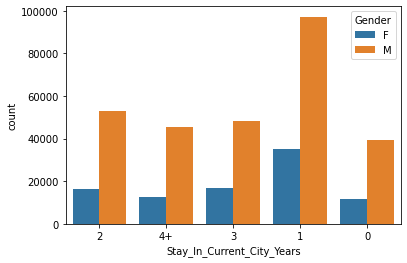

In [233]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = df, hue = 'Gender')
plt.show()

1. Male with residence nearly 1 year are more
2. Male with residence 0 years are less
3. female with residence nearly 1 year are more
4. female with residence 0 years are less

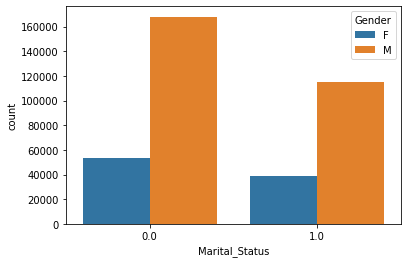

In [234]:
sns.countplot(x = 'Marital_Status', data = df, hue = 'Gender')
plt.show()

1. Unmarreid males are high compared to married mles
2. Unmarreid females are high compared to married Femles


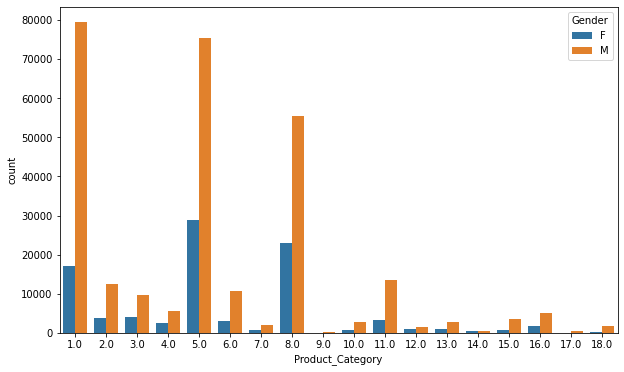

In [235]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Product_Category', data = df, hue = 'Gender')
plt.show()

1. Males tends to buys product category 1 more
2. Females tends to buy product category 5 more
3. Males tends to buy product category 19 least
4. Females tends to buy product category 10, 15 least

# Answering questions 

## Are women spending more money per transaction than men? Why or Why not?

9496.310826415054 8808.351288512074


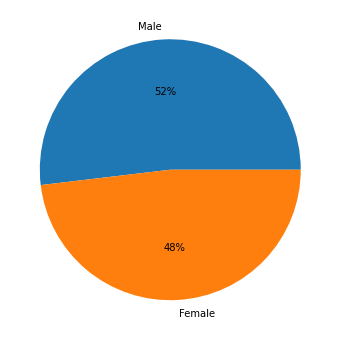

In [236]:
avg_men_spend_per_transaction = df[df['Gender'] == 'M']['Purchase'].sum() / df[df['Gender'] == 'M']['Purchase'].count()
avg_women_spend_per_transaction = df[df['Gender'] == 'F']['Purchase'].sum() / df[df['Gender'] == 'F']['Purchase'].count()

print(df[df['Gender'] == 'M']['Purchase'].sum() / df[df['Gender'] == 'M']['Purchase'].count(), 
      df[df['Gender'] == 'F']['Purchase'].sum() / df[df['Gender'] == 'F']['Purchase'].count())
plt.figure(figsize = (10, 6))
plt.pie([avg_men_spend_per_transaction, avg_women_spend_per_transaction], labels = ['Male', 'Female'], autopct = '%.0f%%')
plt.show()

Avg Women spending per transaction is 8735 and Avg Men spending per 9437. So clearly Men are spending more than women

1. Possibility of the products that are available attracts Men more than women
2. Their is very less data of Female Purchase as compared to men
3. Possibility of Product Cost of Female Items are high 
4. Possibility that women wait for the events where the price becomes low like christmas, new year etc..
5. Possibility of Product Cost of Male Items are low.

## Confidence intervals and distribution of the mean of the expenses by female and male customers

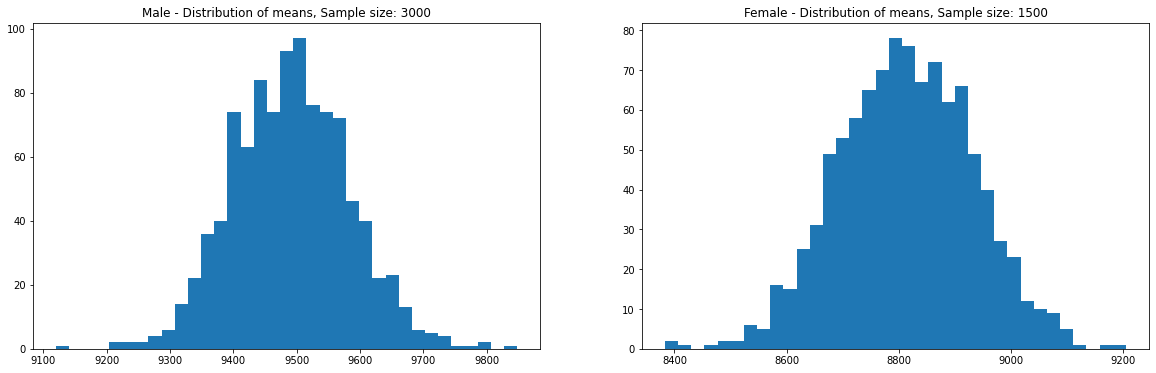

In [237]:
male_df = df.loc[df['Gender']=='M', ['Gender', 'Purchase']]
female_df = df.loc[df['Gender']=='F', ['Gender', 'Purchase']]


genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [238]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 9491.17
Population mean - Mean of sample means of amount spend for Female: 8812.27

Male - Sample mean: 9496.31 Sample std: 5046.36
Female - Sample mean: 8808.35 Sample std: 4719.53


In [239]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (9477.72, 9514.90)
Female confidence interval of means: (8777.93, 8838.77)


## Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

In [240]:
data_df = pd.DataFrame({
    "Lower" : [male_lower_lim, female_lower_lim],
    "Upper": [male_upper_lim, female_upper_lim]
})
data_df.index = ['Male', 'Female']

data_df

,Lower,Upper
Male,9477.724320,9514.897333
Female,8777.931789,8838.770788


Confidence intervals of avg male and female are not overlapping
1. Walmart can try to make a combo pack that could limit between confidence Intervals
2. Try to maintain the product ranges between the 9422 - 9453 for men 
3. Try to maintain the product ranges between the 8709 - 8759 for women
4. Try to make combos of products that are highly sold and products with low sales

## Results when the same activity is performed for Married vs Unmarried

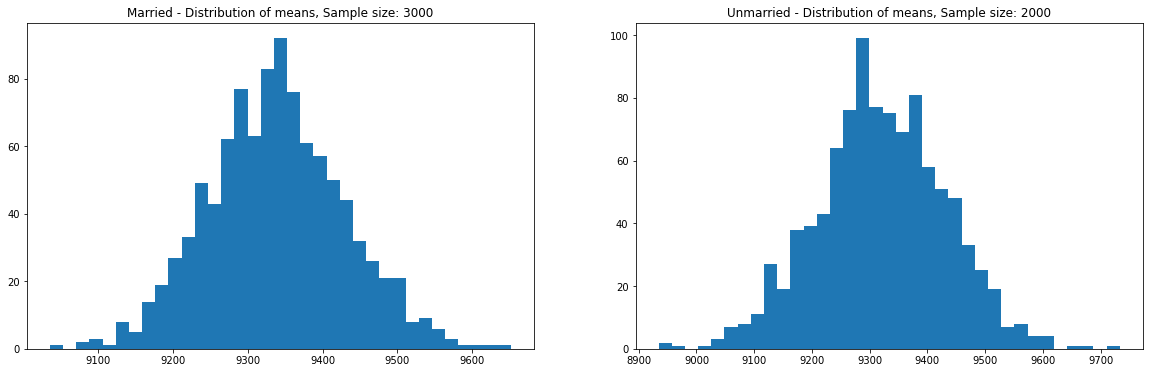

Population mean - Mean of sample means of amount spend for Married: 9338.19
Population mean - Mean of sample means of amount spend for Unmarried: 9320.29

Married - Sample mean: 9337.07 Sample std: 4969.72
Unmarried - Sample mean: 9319.95 Sample std: 4981.59


In [241]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = df[df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = df[df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(df[df['Marital_Status']==1]['Purchase'].mean(), df[df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(df[df['Marital_Status']==0]['Purchase'].mean(), df[df['Marital_Status']==0]['Purchase'].std()))

In [242]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = df[df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (9312.24, 9361.90)
Unmarried confidence interval of means: (9299.22, 9340.69)


## Results when the same activity is performed for Age

In [243]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = df[df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [244]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = df[df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (9280.73, 9331.09)
For age 36-45 --> confidence interval of means: (9367.13, 9438.39)
For age 18-25 --> confidence interval of means: (9182.20, 9256.76)
For age 46-50 --> confidence interval of means: (9213.91, 9323.29)
For age 51-55 --> confidence interval of means: (9567.23, 9689.16)
For age 55+ --> confidence interval of means: (9361.14, 9519.91)
For age 0-17 --> confidence interval of means: (8946.05, 9142.44)


# Final Insights - Illustrate the insights based on exploration and CLT





## Comments on the distribution of the variables and relationship between them





1. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

2. There are 20 differnent types of occupations in the city
3. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
4. More users are Single as compare to Married
5. Most of the users are Male

6. 60% Single, 40% Married






1. Total of 20 product categories are there

2. More users belong to B City_Category
3. There are 20 different types of Occupation and Product_Category
4. 75% of the users are Male and 25% are Female
5. ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

1. Average amount spend by Male customers: 925344.40
2. Average amount spend by Female customers: 712024.39

## Comments for each univariate and bivariate plots

Confidence Interval by Marital_Status

1. Married confidence interval of means: (806668.83, 880384.76)
2. Unmarried confidence interval of means: (848741.18, 912410.38)

Confidence Interval by Age

1. For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
2. For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
3. For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
4. For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
5. For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
6. For age 55+ --> confidence interval of means: (476948.26, 602446.23)
7. For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

## Comments on different variables when generalizing it for Population

Confidence Interval by Gender
Now using the Central Limit Theorem for the population:

1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

Now we can infer about the population that, 95% of the times:

1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

# Recommendations


*   Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1. Men spent more money than women, Hence Focus more on Men products
2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. Unmarried customers spend more money than married customers, So walmart should focus on acquisition of Unmarried customers.
4. Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.